## 自编码器(Auto encoder)

In [1]:
import tensorflow as tf

(X_train, _), (X_test, _) = tf.keras.datasets.mnist.load_data()
X_train = X_train[:30000].reshape(-1, 28 * 28) / 255
X_test = X_test[:100].reshape(-1, 28 * 28) / 255

X_train.shape, X_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


((30000, 784), (100, 784))

In [2]:
# 输出 定义输入层为784个节点
input_ = tf.keras.layers.Input(shape=(784,))
# 编码器 定义编码器层为64个节点
encoded = tf.keras.layers.Dense(64, activation="relu")(input_)
# 解码器 定义解码器层为784个节点
decoded = tf.keras.layers.Dense(784, activation="sigmoid")(encoded)

# 建立函数模型，指定输入和输出层
model = tf.keras.models.Model(inputs=input_, outputs=decoded)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,200 (395.31 KB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
model.compile(optimizer="adam", loss="binary_crossentropy")
# 对vae 而言，输入和输出是同一个
model.fit(X_train, X_train, batch_size=64, epochs=10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Max value in encoded_code: 14.237018585205078
Min value in encoded_code: 0.0


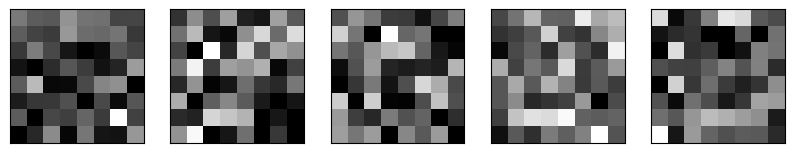

In [12]:
from matplotlib import pyplot as plt

# 可视化前 5 个测试样本的编码结果
n = 5
encoder = tf.keras.models.Model(input_, encoded)  # 仅编码器模型
encoded_code = encoder.predict(X_test[:n])  # 编码之后的 Code
print(f"Max value in encoded_code: {encoded_code.max()}")
print(f"Min value in encoded_code: {encoded_code.min()}")
# 可视化前 5 个测试样本编码之后的 Code
plt.figure(figsize=(10, 8))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_code[i].reshape(8, 8).T, cmap="gray")
    ax.get_xaxis().set_visible(False)  # 不显示坐标
    ax.get_yaxis().set_visible(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


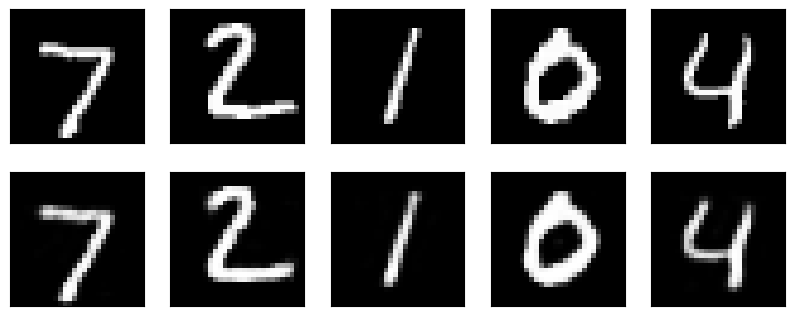

In [6]:
decoded_code = model.predict(X_test[:n])  # 自动编码器推理
plt.figure(figsize=(10, 6))
for i in range(n):
    # 输出原始测试样本图像
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 输出自动编码器重构后的图像
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(decoded_code[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

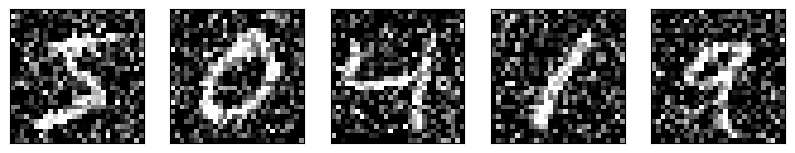

In [8]:
import numpy as np

X_train_ = X_train + 0.4 * np.random.normal(size=X_train.shape)  # 添加同尺寸随机值
X_test_ = X_test + 0.4 * np.random.normal(size=X_test.shape)
X_train_noisy = np.clip(X_train_, 0, 1)  # 将数组规约到 [0, 1] 之间
X_test_noisy = np.clip(X_test_, 0, 1)

X_train_noisy.shape, X_test_noisy.shape
plt.figure(figsize=(10, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X_train_noisy[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1144
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.1014
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.1001
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.0994
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.0995
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.0988
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 0.0987
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 0.0986
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.0983
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.0985
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


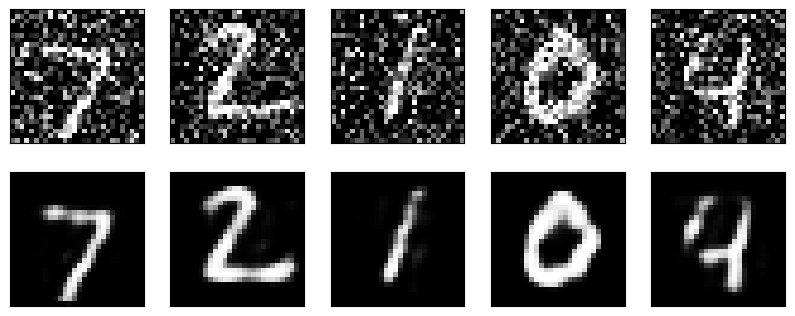

In [9]:
model.fit(X_train_noisy, X_train, batch_size=64, epochs=10)

decoded_code = model.predict(X_test_noisy[:n])  # 自动编码器推理
plt.figure(figsize=(10, 6))
for i in range(n):
    # 输出原始测试样本图像
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 输出自动编码器去噪后的图像
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(decoded_code[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)




In [14]:
# 0.4 * np.random.normal(size=X_train.shape)

# 获取解码器
decoder_input = tf.keras.layers.Input(shape=(64,))
decoder_layer1 = model.layers[-1]  # 获取最后一层，解码器层
decoder = tf.keras.models.Model(decoder_input, decoder_layer1(decoder_input))
decoder.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,960 (199.06 KB)

 Trainable params: 50,960 (199.06 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


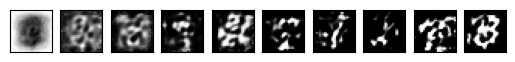

In [15]:
for i in range(10):
    # 生成随机噪声
    noise = i * np.random.normal(size=(1, 64))
    noise = np.clip(noise, 0, None)
    # 通过解码器生成新图像
    generated_code = decoder.predict(noise)
    # 可视化生成的图像
    ax = plt.subplot(1, 10, i + 1)
    plt.imshow(generated_code.reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)